In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testcsv/test.csv
/kaggle/input/traincsv/train.csv


In [2]:
import pandas as pd
import numpy as np
import missingno as ms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from cuml.svm import SVC
from cuml.ensemble import RandomForestClassifier as cuRFC
from cuml.linear_model import LogisticRegression
import tensorflow as tf
from cuml import LinearRegression
from cuml.linear_model import LinearRegression

In [3]:

Path="../input/traincsv/train.csv"
df = pd.read_csv(Path)
df_test=pd.read_csv("../input/testcsv/test.csv")

In [4]:
df.head()

,home_team,away_team,country,neutral,Outcome,id
0,Denmark,Germany,Denmark,False,1,0
1,Brazil,Saudi Arabia,Mexico,True,1,1
2,Equatorial Guinea,Morocco,Equatorial Guinea,False,0,2
3,Burma,Hong Kong,Burma,False,1,3
4,Albania,Portugal,Albania,False,0,4


In [5]:
df.isnull().sum()
#hence no null values 



home_team    0
away_team    0
country      0
neutral      0
Outcome      0
id           0
dtype: int64

In [6]:
df['home_adv'] = df['home_team']==df['country']
df['home_disadv'] = df['away_team']==df['country']
df_test['home_adv'] = df_test['home_team']==df_test['country']
df_test['home_disadv'] = df_test['away_team']==df_test['country']

In [7]:
teams = {}
booleanDict = {
    False : 0,
    True : 1
}
counter = 1
for team in df['home_team'] :
    if team not in teams :
        teams[team] = counter
        counter += 1
for team in df['away_team'] :
    if team not in teams :
        teams[team] = counter
        counter+=1
for i in range(len(df['home_team'])) :
    df['home_team'][i] = teams[df['home_team'][i]]
for i in range(len(df['away_team'])) :
    df['away_team'][i] = teams[df['away_team'][i]]
for i in range(len(df_test['home_team'])) :
    df_test['home_team'][i] = teams[df_test['home_team'][i]]
for i in range(len(df_test['away_team'])) :
    df_test['away_team'][i] = teams[df_test['away_team'][i]]
for i in range(len(df['neutral'])) :
    df['neutral'][i] = booleanDict[df['neutral'][i]]
    df['home_adv'][i] = booleanDict[df['home_adv'][i]]
    df['home_disadv'][i] = booleanDict[df['home_disadv'][i]]
for i in range(len(df_test['neutral'])) :
    df_test['neutral'][i] = booleanDict[df_test['neutral'][i]]
    df_test['home_adv'][i] = booleanDict[df_test['home_adv'][i]]
    df_test['home_disadv'][i] = booleanDict[df_test['home_disadv'][i]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarn

In [8]:
df = df.drop(['country'],axis=1)
df_test = df_test.drop(['country'],axis=1)

In [9]:
df

,home_team,away_team,neutral,Outcome,id,home_adv,home_disadv
0,1,7,0,1,0,1,0
1,2,29,1,1,1,0,0
2,3,45,0,0,2,1,0
3,4,121,0,1,3,1,0
4,5,25,0,0,4,1,0
...,...,...,...,...,...,...,...
29995,147,134,1,0,29995,0,0
29996,96,104,0,1,29996,1,0
29997,91,25,1,1,29997,0,0
29998,91,41,0,0,29998,1,0


In [10]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(df.drop(['Outcome'],axis=1), df['Outcome'])
print(df.columns)
clf.feature_importances_

Index(['home_team', 'away_team', 'neutral', 'Outcome', 'id', 'home_adv',
       'home_disadv'],
      dtype='object')


array([0.1751921 , 0.37003229, 0.19278711, 0.00819569, 0.24838884,
       0.00540397])

In [11]:
train_x,test_x,train_y,test_y = train_test_split(df.drop(['Outcome','id','home_disadv'],axis=1),df['Outcome'],test_size=0.2,random_state=0)


In [12]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(train_x, train_y)
print(train_x.columns)
clf.feature_importances_

Index(['home_team', 'away_team', 'neutral', 'home_adv'], dtype='object')


array([0.3163739 , 0.28394921, 0.15787956, 0.24179733])

In [13]:
train_x

,home_team,away_team,neutral,home_adv
3225,14,114,1,0
11815,162,178,0,1
7338,151,129,1,0
14980,117,53,0,1
27167,140,91,0,1
...,...,...,...,...
13123,176,223,0,1
19648,98,133,0,1
9845,56,152,0,1
10799,96,101,0,1


In [14]:
X = np.asarray(train_x.values, dtype=np.float32)
y = np.asarray(train_y.values, dtype=np.float32)
lr = LinearRegression(fit_intercept = False, normalize = False,algorithm = "svd")
reg = lr.fit(X,y)
preds = reg.predict(np.asarray(test_x.values, dtype=np.float32))
newPreds = []
for i in range(len(preds)) :
    if preds[i] <= 0.5 :
        newPreds.append(0)
    else :
        newPreds.append(1)
preds = reg.predict(np.asarray(test_x.values, dtype=np.float32))
from cuml.metrics.accuracy import accuracy_score
print(accuracy_score(test_y,np.asarray(newPreds)))
import cuml
MAE = cuml.metrics.regression.mean_absolute_error(test_y,np.asarray(newPreds))
print(MAE)

0.6274999976158142
0.3725


In [15]:
X = np.asarray(train_x.values, dtype=np.float32)
y = np.asarray(train_y.values, dtype=np.float32)
clf = SVC(kernel='rbf', degree=3, gamma='auto', C=1)
clf.fit(X, y)
cuml_predict = clf.predict(np.asarray(test_x.values, dtype=np.float32))
from cuml.metrics.accuracy import accuracy_score
print(accuracy_score(test_y,cuml_predict))

0.6813333630561829


In [16]:
X = np.asarray(train_x.values, dtype=np.float32)
y = np.asarray(train_y.values, dtype=np.float32)
cuml_model = cuRFC(max_features=1.0,
                   n_bins=128,
                   n_estimators=200)
cuml_model.fit(X,y)
cuml_predict = cuml_model.predict(np.asarray(test_x.values, dtype=np.float32))
from cuml.metrics.accuracy import accuracy_score
print(accuracy_score(test_y,cuml_predict))

0.6973333358764648


In [17]:
X = np.asarray(train_x.values, dtype=np.float32)
y = np.asarray(train_y.values, dtype=np.float32)
reg = LogisticRegression()
reg.fit(X,y)
preds = reg.predict(np.asarray(test_x.values, dtype=np.float32))
from cuml.metrics.accuracy import accuracy_score
print(accuracy_score(test_y,preds))

0.6386666893959045


In [18]:
train_x,test_x,train_y,test_y = train_test_split(df.drop(['Outcome','id','home_disadv'],axis=1),df['Outcome'],test_size=0.2,random_state=0)


In [19]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = ann.fit(train_x.astype(float),train_y.astype(float),batch_size=32,epochs=2)

2022-03-17 06:53:58.052503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 06:53:58.057031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 06:53:58.057727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 06:53:58.058765: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/2
750/750 [==============================] - 2s 2ms/step - loss: 0.7244 - accuracy: 0.6249
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.6533 - accuracy: 0.6319


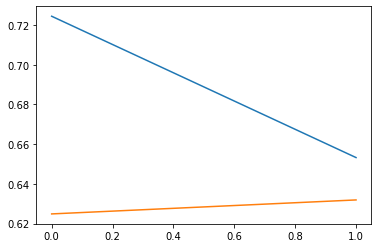

0.37216666666666665


In [20]:
loss=history.history['loss']
acc=history.history['accuracy']
epochs=range(len(loss))
import matplotlib.pyplot as plt
plt.plot(epochs,loss)
plt.plot(epochs,acc)
plt.show()
prob = ann.predict(test_x.astype(float))
preds = []
for prediction in prob :
    if prediction<=0.5 :
        preds.append(0)
    else :
        preds.append(1)
import cuml
MAE = cuml.metrics.regression.mean_absolute_error(test_y,np.asarray(preds))
print(MAE)

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 100,activation='relu'))
ann.add(tf.keras.layers.Dropout(.4))
ann.add(tf.keras.layers.Dense(units = 100,activation='relu'))
ann.add(tf.keras.layers.Dropout(.4))
ann.add(tf.keras.layers.Dense(units = 100,activation='relu'))
ann.add(tf.keras.layers.Dropout(.4))
ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))
ann.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=ann.fit(train_x.astype(float),train_y.astype(float),batch_size=32,epochs=2)

Epoch 1/2
750/750 [==============================] - 2s 2ms/step - loss: 1.3346 - accuracy: 0.5700
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.6777 - accuracy: 0.6164


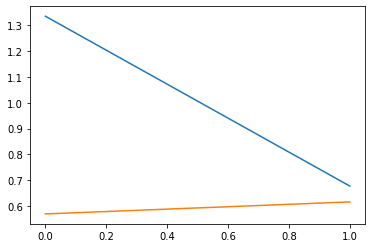

In [22]:
loss=history.history['loss']
acc=history.history['accuracy']
epochs=range(len(loss))
import matplotlib.pyplot as plt
plt.plot(epochs,loss)
plt.plot(epochs,acc)
plt.show()

In [23]:
prob = ann.predict(test_x.astype(float))
preds = []
for prediction in prob :
    if prediction<=0.5 :
        preds.append(0)
    else :
        preds.append(1)
import cuml
MAE = cuml.metrics.regression.mean_absolute_error(test_y,np.asarray(preds))
print(MAE)

0.37216666666666665


In [24]:
df_test = df_test.drop(['id','home_disadv'],axis=1)
df_test

,home_team,away_team,neutral,home_adv
0,177,88,0,1
1,70,112,0,1
2,41,14,1,0
3,145,200,1,0
4,191,115,1,0
...,...,...,...,...
2808,209,133,0,1
2809,126,153,0,1
2810,196,114,1,0
2811,41,79,0,1


In [25]:
X = np.asarray(train_x.values, dtype=np.float32)
y = np.asarray(train_y.values, dtype=np.float32)
cuml_model = cuRFC(max_features=1.0,
                   n_bins=128,
                   n_estimators=200)
cuml_model.fit(X,y)
prob = cuml_model.predict(np.asarray(df_test.values, dtype=np.float32))
preds = []
for prediction in prob :
    if prediction<=0.5 :
        preds.append(0)
    else :
        preds.append(1)
counter = 30000
ids = []
for i in range(len(preds)) :
    ids.append(counter)
    counter += 1
final = pd.DataFrame(ids)
final['id'] = ids
final['Outcome'] = preds
final = final.drop([0],axis=1)
submission = final.to_csv('./submission.csv',index=False)